In [0]:
library(dplyr)

In [0]:
library(ggplot2)

In [0]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library(DT)
library(arules)

In [0]:
install("devtools")    
library("devtools")
install_github("mhahsler/arules")

ERROR: ignored

In [0]:
crimeData = read.csv(file = "./CrimeData2015.csv",header = T,sep = ',')
crimeData[sample(x = 1:1048575,size = 15),] # a brief look at the data

,day,month,year,time,Borough,dayPart,Latitude,Longitude,offenseDescription,pdDescription,crimeCompleted,offenseLevel,occurenceLocation,premiseDescription
,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
389290,19,3,2015,18.17,BRONX,17-22,40.85284,-73.88417,ASSAULT_AND_RELATED_OFFENSES,MENACING_UNCLASSIFIED,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE_APT_HOUSE
516938,27,11,2014,17.75,BROOKLYN,17-22,40.62705,-73.99864,CRIMINAL_MISCHIEF_AND_RELATED_OF,MISCHIEF_CRIMINAL___OF_MOTOR,COMPLETED,MISDEMEANOR,FRONT_OF,STREET
367775,5,4,2015,22.00,QUEENS,17-22,40.70037,-73.81941,BURGLARY,BURGLARY_COMMERCIAL_NIGHT,COMPLETED,FELONY,INSIDE,FACTORY_WAREHOUSE
423844,11,1,2015,10.75,BRONX,06-12,40.86136,-73.89773,CRIMINAL_MISCHIEF_AND_RELATED_OF,TAMPERING_CRIMINAL,COMPLETED,FELONY,MISSING_VALUE,TRANSIT_NYC_SUBWAY
542914,7,11,2014,8.58,QUEENS,06-12,40.67917,-73.75839,PETIT_LARCENY,LARCENY_PETIT_FROM_BUILDING_UN,COMPLETED,MISDEMEANOR,INSIDE,FOOD_SUPERMARKET
590093,28,9,2014,2.00,BRONX,22-06,40.85747,-73.89676,ASSAULT_AND_RELATED_OFFENSES,ASSAULT,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE_APT_HOUSE
968693,1,1,2014,16.33,BROOKLYN,12-17,40.66659,-73.94803,ASSAULT_AND_RELATED_OFFENSES,ASSAULT,ATTEMPTED,MISDEMEANOR,FRONT_OF,STREET
408190,4,3,2015,18.75,MANHATTAN,17-22,40.74450,-73.99165,HARRASSMENT_,HARASSMENT_SUBD_CIVILIAN,COMPLETED,VIOLATION,INSIDE,COMMERCIAL_BUILDING
233379,13,7,2015,2.17,MANHATTAN,22-06,40.71132,-73.98903,CRIMINAL_MISCHIEF_AND_RELATED_OF,MISCHIEF_CRIMINAL_UNCL_ND,COMPLETED,FELONY,INSIDE,RESIDENCE_PUBLIC_HOUSING


In [0]:
summary(crimeData)

      day            month             year           time      
 Min.   : 1.00   Min.   : 1.000   Min.   :1015   Min.   : 0.00  
 1st Qu.: 8.00   1st Qu.: 4.000   1st Qu.:2014   1st Qu.: 9.00  
 Median :15.00   Median : 7.000   Median :2014   Median :14.67  
 Mean   :15.52   Mean   : 6.947   Mean   :2014   Mean   :13.51  
 3rd Qu.:23.00   3rd Qu.:10.000   3rd Qu.:2015   3rd Qu.:19.00  
 Max.   :31.00   Max.   :12.000   Max.   :2015   Max.   :23.98  
 NA's   :65      NA's   :65       NA's   :65                    
          Borough        dayPart          Latitude       Longitude     
 BRONX        :227477   06-12:220746   Min.   :40.50   Min.   :-74.26  
 BROOKLYN     :315648   12-17:279515   1st Qu.:40.67   1st Qu.:-73.97  
 MANHATTAN    :244749   17-22:291612   Median :40.73   Median :-73.93  
 QUEENS       :211958   22-06:256702   Mean   :40.73   Mean   :-73.93  
 STATEN_ISLAND: 48743                  3rd Qu.:40.81   3rd Qu.:-73.88  
                                       Max.   :4

Warning message:
“Use of `crimeData$Borough` is discouraged. Use `Borough` instead.”


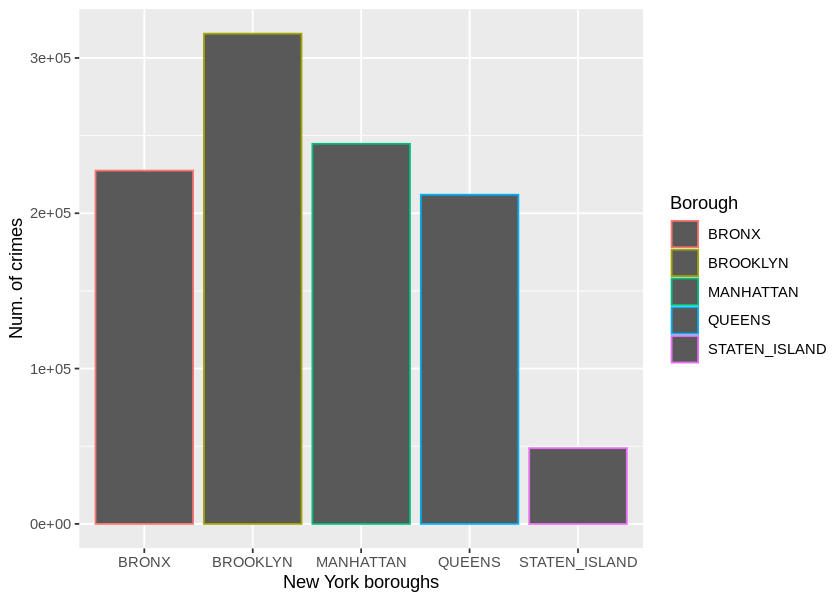

In [0]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(data = crimeData) + geom_bar(mapping = aes(x = crimeData$Borough,color = Borough))+
xlab("New York boroughs") + ylab("Num. of crimes")

Warning message:
“Use of `crimeData$offenseLevel` is discouraged. Use `offenseLevel` instead.”


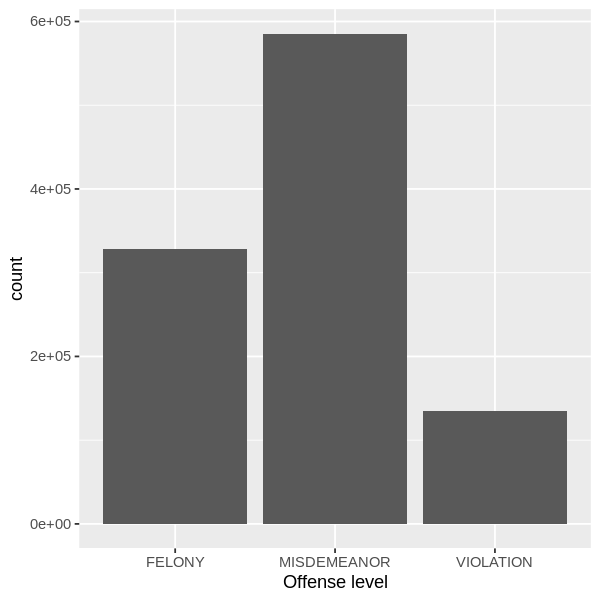

In [0]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(data = crimeData) + geom_bar(mapping = aes(x = crimeData$offenseLevel)) + xlab("Offense level")

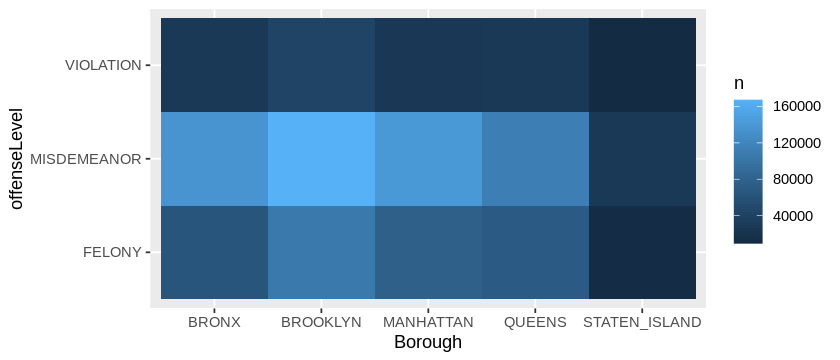

In [0]:
options(repr.plot.width=7, repr.plot.height=3)
subset(crimeData,year >= 2012) %>% count(Borough , offenseLevel) %>% 
ggplot(mapping = aes(x = Borough , y = offenseLevel)) + 
geom_tile(mapping = aes(fill = n))

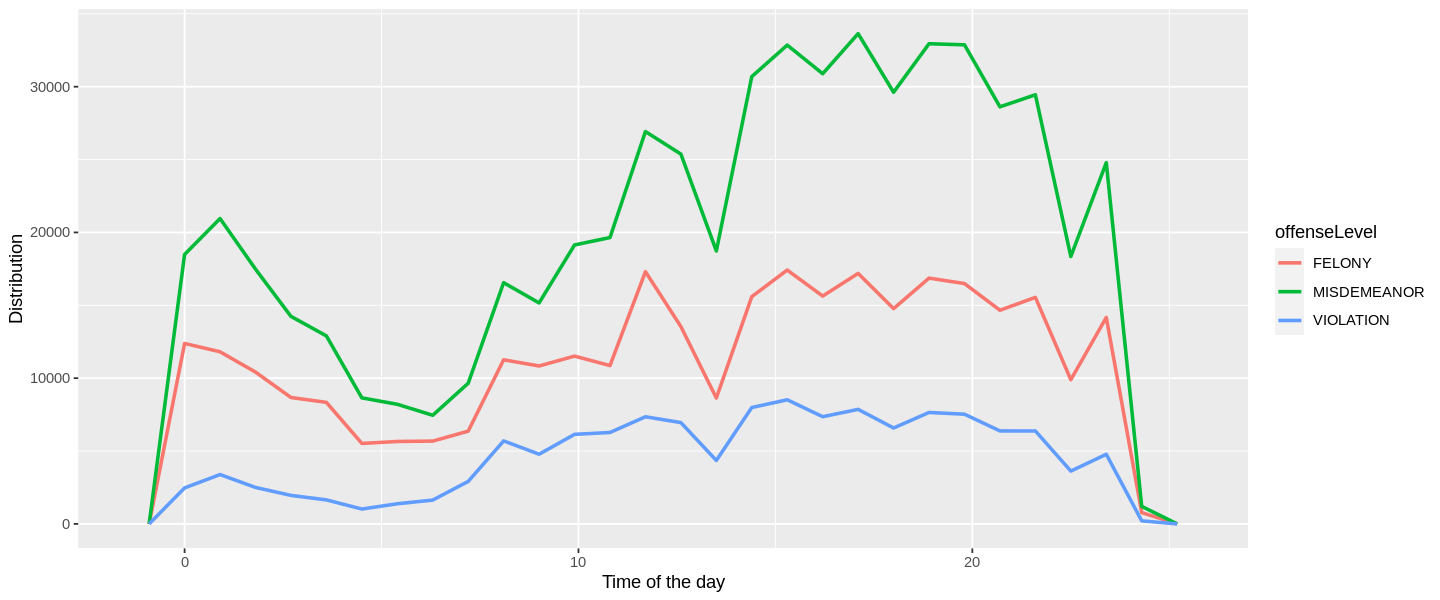

In [0]:
options(repr.plot.width=12, repr.plot.height=5)
ggplot(crimeData , mapping = aes(x = time,colour = offenseLevel))+ 
geom_freqpoly(binwidth = 0.9 , lwd = 1) + xlab("Time of the day")+ylab('Distribution')

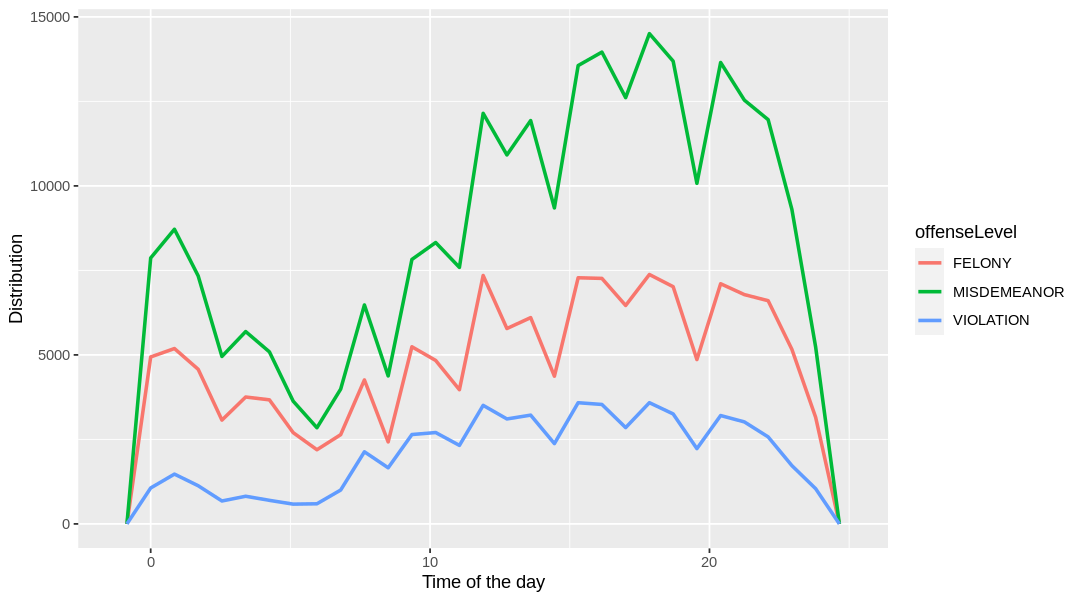

In [0]:
options(repr.plot.width=9, repr.plot.height=5)
subset(crimeData,year == 2015) %>%
ggplot(mapping = aes(x = time,colour = offenseLevel))+geom_freqpoly(binwidth = 0.85 , lwd = 1) + 
xlab("Time of the day")+ylab('Distribution')

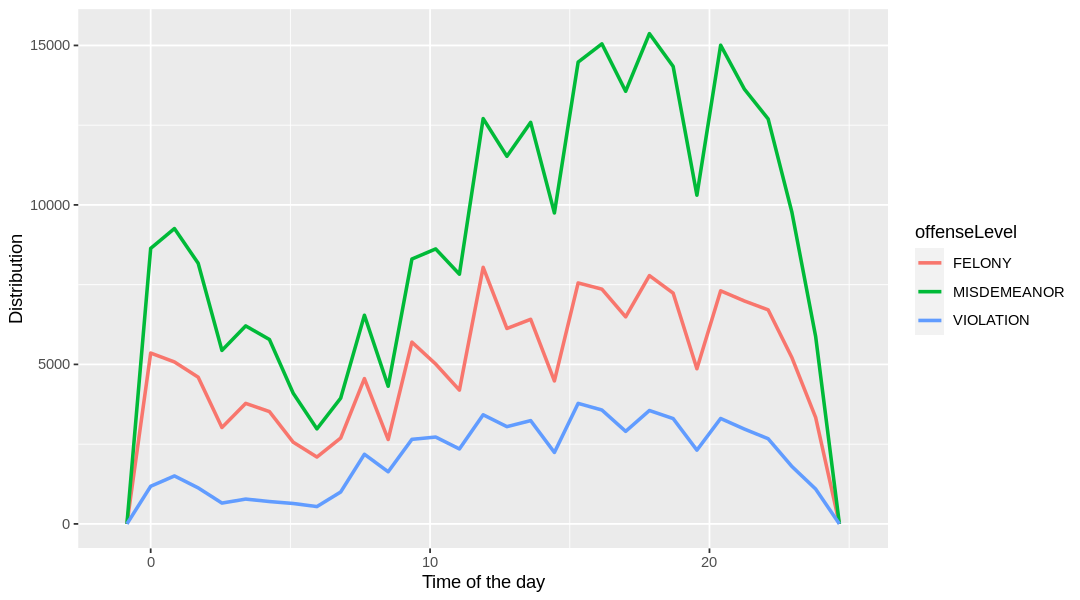

In [0]:
options(repr.plot.width=9, repr.plot.height=5)
subset(crimeData,year == 2014) %>%
ggplot(mapping = aes(x = time,colour = offenseLevel))+geom_freqpoly(binwidth = 0.85 , lwd = 1) + 
xlab("Time of the day")+ylab('Distribution')

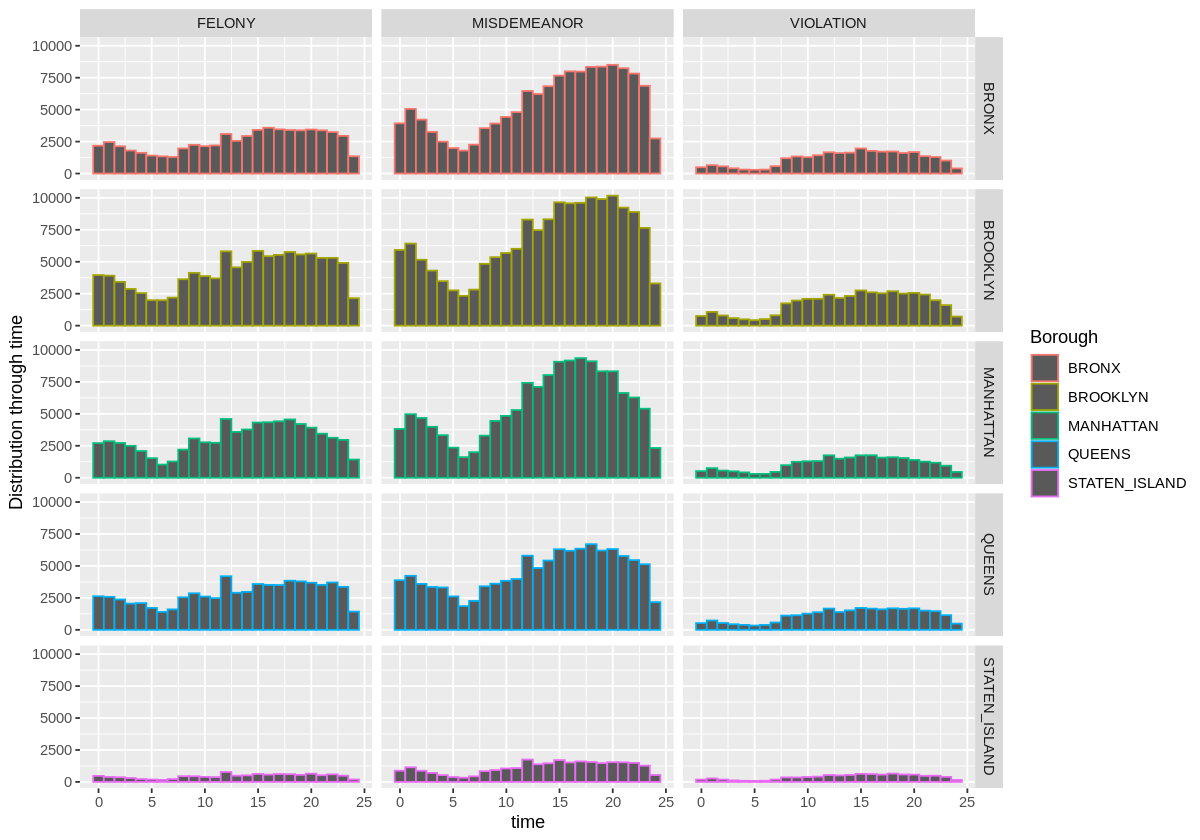

In [0]:
options(repr.plot.width=10, repr.plot.height=7)
qplot(data = subset(crimeData,year >= 2012) ,color =Borough, x = time , bins = 25 , ylab = "Distribution through time") + facet_grid(Borough~offenseLevel)

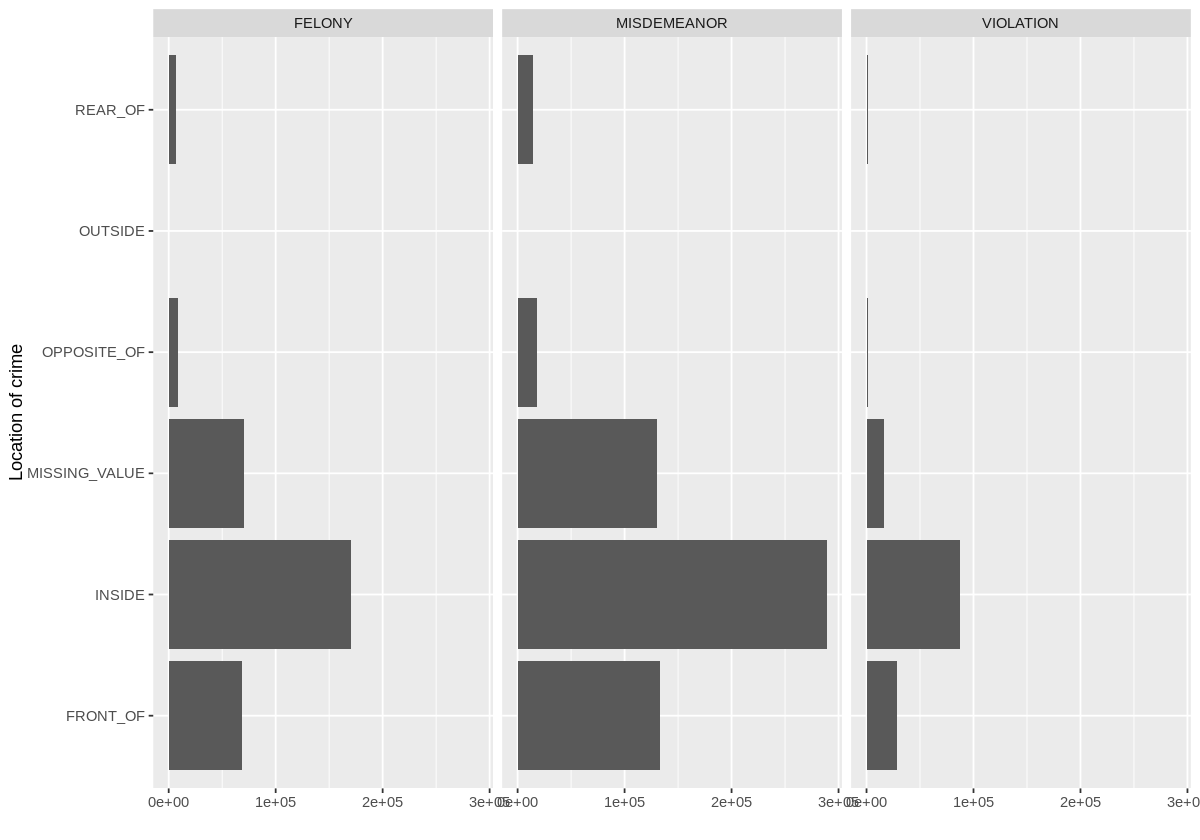

In [0]:
qplot(data = subset(crimeData,year >= 2013) , x = occurenceLocation,xlab = "Location of crime")+
facet_grid(.~offenseLevel) + coord_flip()

In [0]:
rules <- apriori(data = subset(crimeData,year >= 2011)[,c(4,9,11,14)] , 
parameter = list(support = 0.000001 , confidence = 0.85,maxlen = 5),
appearance = list(rhs = c('crimeCompleted=ATTEMPTED')))

Warning message:
“Column(s) 1 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.85    0.1    1 none FALSE            TRUE       5   1e-06      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[145 item(s), 1046908 transaction(s)] done [0.28s].
sorting and recoding items ... [141 item(s)] done [0.03s].
creating transaction tree ... done [0.82s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.07s].


In [0]:
inspect(head(sort(rules,by='lift'),10))

    lhs                                                 rhs                             support confidence     lift count
[1] {offenseDescription=FRAUDULENT_ACCOSTING,                                                                            
     premiseDescription=PARKING_LOT_GARAGE_(PUBLIC)} => {crimeCompleted=ATTEMPTED} 1.910388e-06          1 55.93055     2
[2] {offenseDescription=RAPE,                                                                                            
     premiseDescription=BEAUTY_&_NAIL_SALON}         => {crimeCompleted=ATTEMPTED} 1.910388e-06          1 55.93055     2
[3] {time=[11.3,17.5),                                                                                                   
     offenseDescription=RAPE,                                                                                            
     premiseDescription=TRANSIT_NYC_SUBWAY}          => {crimeCompleted=ATTEMPTED} 2.865581e-06          1 55.93055     3


In [0]:
rules <- apriori(data = subset(crimeData,year >= 2013)[,c(4,5,9,11,14)] , 
parameter = list(support = 0.00001 , confidence = 0.55,maxlen = 5),
appearance = list(rhs = c('crimeCompleted=ATTEMPTED')))

Warning message:
“Column(s) 1 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.55    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[150 item(s), 1045101 transaction(s)] done [0.32s].
sorting and recoding items ... [135 item(s)] done [0.04s].
creating transaction tree ... done [1.01s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.07s].


In [0]:
inspect(head(sort(rules,by='lift'),10))

    lhs                                                     rhs                             support confidence     lift count
[1] {time=[11.3,17.5),                                                                                                       
     offenseDescription=KIDNAPPING_AND_RELATED_OFFENSES,                                                                     
     premiseDescription=STREET}                          => {crimeCompleted=ATTEMPTED} 1.435268e-05  0.6521739 36.47975    15
[2] {Borough=BRONX,                                                                                                          
     offenseDescription=ROBBERY,                                                                                             
     premiseDescription=CHECK_CASHING_BUSINESS}          => {crimeCompleted=ATTEMPTED} 1.339583e-05  0.5833333 32.62911    14
[3] {time=[0,11.3),                                                                                                   

In [0]:
rules <- apriori(data = subset(crimeData,year>=2015)[,c(4,5,9,11,14)] , 
parameter = list(support = 0.00001 , confidence = 0.7,maxlen = 5,target='rules'),
appearance = list(rhs = c('offenseDescription=BURGLARY')))

Warning message:
“Column(s) 1 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[147 item(s), 468576 transaction(s)] done [0.17s].
sorting and recoding items ... [136 item(s)] done [0.02s].
creating transaction tree ... done [0.38s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.03s].


In [0]:
inspect(head(sort(rules,by='lift'),10))

    lhs                                      rhs                                support confidence    lift count
[1] {Borough=QUEENS,                                                                                            
     crimeCompleted=ATTEMPTED,                                                                                  
     premiseDescription=CHURCH}           => {offenseDescription=BURGLARY} 1.067063e-05       1.00 31.2384     5
[2] {time=[0,11.3),                                                                                             
     Borough=QUEENS,                                                                                            
     crimeCompleted=ATTEMPTED,                                                                                  
     premiseDescription=RESTAURANT_DINER} => {offenseDescription=BURGLARY} 2.560951e-05       0.75 23.4288    12
[3] {time=[0,11.3),                                                                             

In [0]:
rules <- apriori(data = subset(crimeData,year>=2015)[,c(4,5,9,14)] , 
parameter = list(support = 0.00001 , confidence = 0.75,maxlen = 5,target='rules'),
appearance = list(rhs = c('offenseDescription=GRAND_LARCENY')))

Warning message:
“Column(s) 1 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[145 item(s), 468576 transaction(s)] done [0.13s].
sorting and recoding items ... [134 item(s)] done [0.02s].
creating transaction tree ... done [0.36s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.04s].


In [0]:
inspect(head(sort(rules,by='lift'),10))

    lhs                         rhs                                     support confidence    lift count
[1] {time=[0,11.3),                                                                                     
     Borough=QUEENS,                                                                                    
     premiseDescription=ATM} => {offenseDescription=GRAND_LARCENY} 4.695076e-05  0.8461538 9.42514    22


In [0]:
rules <- apriori(data = subset(crimeData,year >= 2015)[,c(4,5,9,14)] , 
parameter = list(support = 0.00001 , confidence = 0.7,maxlen = 5,target='rules'),
appearance = list(rhs = c('offenseDescription=PETIT_LARCENY')))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[142 item(s), 468576 transaction(s)] done [0.09s].
sorting and recoding items ... [131 item(s)] done [0.01s].
creating transaction tree ... done [0.24s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [17 rule(s)] done [0.00s].
creating S4 object  ... done [0.02s].


In [0]:
inspect(head(sort(rules,by='lift'),100))

     lhs                                      rhs                                     support confidence     lift count
[1]  {Borough=BRONX,                                                                                                   
      premiseDescription=BOOK_CARD}        => {offenseDescription=PETIT_LARCENY} 1.280475e-05  0.8571429 5.007625     6
[2]  {Borough=STATEN_ISLAND,                                                                                           
      premiseDescription=DEPARTMENT_STORE} => {offenseDescription=PETIT_LARCENY} 1.011575e-03  0.8345070 4.875381   474
[3]  {Borough=BRONX,                                                                                                   
      premiseDescription=DEPARTMENT_STORE} => {offenseDescription=PETIT_LARCENY} 3.760329e-03  0.8311321 4.855664  1762
[4]  {Borough=QUEENS,                                                                                                  
      premiseDescription=DEPARTMENT_STOR

In [0]:
rules <- apriori(data = subset(crimeData,year>=2015)[,c(4,5,9,14)] , 
parameter = list(support = 0.00001 , confidence = 0.7,maxlen = 5,target='rules'),
appearance = list(rhs = c('offenseDescription=DANGEROUS_DRUGS')))
inspect(head(sort(rules,by='lift'),100))

Warning message:
“Column(s) 1 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[145 item(s), 468576 transaction(s)] done [0.20s].
sorting and recoding items ... [134 item(s)] done [0.03s].
creating transaction tree ... done [0.52s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.04s].
    lhs                                        rhs                                       support confidence     lift count
[1] {time=[17.5,24],                                                                                                      
     Borough=QUEENS,                  

In [0]:
inspect(head(sort(rules,by='lift'),100))

    lhs                                        rhs                                       support confidence     lift count
[1] {time=[17.5,24],                                                                                                      
     Borough=QUEENS,                                                                                                      
     premiseDescription=ABANDONED_BUILDING} => {offenseDescription=DANGEROUS_DRUGS} 2.987776e-05  0.7368421 14.60209    14


In [0]:
rules <- apriori(data = subset(crimeData,year>=2015)[,c(4,5,9,14)] , 
parameter = list(support = 0.00001 , confidence = 0.7,maxlen = 5,target='rules'),
appearance = list(rhs = c('offenseDescription=CRIMINAL_MISCHIEF_AND_RELATED_OF')))
inspect(head(sort(rules,by='lift'),100))

Warning message:
“Column(s) 1 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[145 item(s), 468576 transaction(s)] done [0.13s].
sorting and recoding items ... [134 item(s)] done [0.02s].
creating transaction tree ... done [0.38s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [17 rule(s)] done [0.00s].
creating S4 object  ... done [0.03s].
     lhs                                        rhs                                                        support confidence     lift count
[1]  {time=[0,11.3),                                                                                                                        
 

In [0]:
rules <- apriori(data = subset(crimeData,year>=2015)[,c(4,5,9,14)] , 
parameter = list(support = 0.00001 , confidence = 0.7,maxlen = 5,target='rules'),
appearance = list(rhs = c('offenseDescription=INTOXICATED_AND_IMPAIRED_DRIVING')))
inspect(head(sort(rules,by='lift'),100))

Warning message:
“Column(s) 1 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[145 item(s), 468576 transaction(s)] done [0.13s].
sorting and recoding items ... [134 item(s)] done [0.02s].
creating transaction tree ... done [0.33s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.03s].
    lhs                                     rhs                                                        support confidence     lift count
[1] {time=[0,11.3),                                                                                                                     
     Borou

In [0]:
rules <- apriori(data = subset(crimeData,year>=2015)[,c(4,5,9,14)] , 
parameter = list(support = 0.00001 , confidence = 0.7,maxlen = 5,target='rules'),
appearance = list(rhs = c('offenseDescription=OTHER_OFFENSES_RELATED_TO_THEF')))
inspect(head(sort(rules,by='lift'),100))

Warning message:
“Column(s) 1 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[145 item(s), 468576 transaction(s)] done [0.13s].
sorting and recoding items ... [134 item(s)] done [0.02s].
creating transaction tree ... done [0.33s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.03s].
    lhs                                            rhs                                                      support confidence    lift count
[1] {time=[11.3,17.5),                                                                                                                      
  

In [0]:
rules <- apriori(data = subset(crimeData,year>=2015)[,c(4,5,9,14)] , 
parameter = list(support = 0.00001 , confidence = 0.7,maxlen = 5,target='rules'),
appearance = list(rhs = c('offenseDescription=LOITERING_FOR_DRUG_PURPOSES')))
inspect(head(sort(rules,by='lift'),100))

Warning message:
“Column(s) 1 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[146 item(s), 468576 transaction(s)] done [0.13s].
sorting and recoding items ... [134 item(s)] done [0.02s].
creating transaction tree ... done [0.35s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.03s].
